In [1]:
import sys
sys.path.insert(0, '../../../network')
import logging
import argparse
import numpy as np
from network import Population, RateNetwork
from learning import ReachingTask
from transfer_functions import ErrorFunction
from connectivity import SparseConnectivity, LinearSynapse, ThresholdPlasticityRule, set_connectivity 
from sequences import GaussianSequence
import matplotlib.pyplot as plt
import seaborn as sns
logging.basicConfig(level=logging.INFO)

### Initialization

In [2]:
params = np.load("./ctx_str_params.npz", allow_pickle=True) 
N, sequences, patterns, cp, cw, A = params['N'], params['sequences'], params['patterns'], params['cp'], params['cw'], params['A']

In [3]:
phi = ErrorFunction(mu=0.22, sigma=0.1).phi
plasticity = ThresholdPlasticityRule(x_f=0.5, q_f=0.8)

# populations
ctx = Population(N=N[0], tau=1e-2, phi=phi, name='ctx')
d1 = Population(N=N[1], tau=1e-2, phi=phi, name='d1')
# d2 = Population(N=N[2], tau=1e-2, phi=phi, name='d2')

J = set_connectivity([ctx, d1], cp, cw, A, patterns, plasticity)
network = RateNetwork([ctx, d1], J, formulation=4, disable_pbar=False)

INFO:connectivity:Building connections from ctx to ctx
INFO:connectivity:Building connections from ctx to d1
INFO:connectivity:Building connections from d1 to ctx
INFO:connectivity:Building connections from d1 to d1


### Simulation

In [4]:
init_inputs = [np.zeros(ctx.size),
               np.zeros(d1.size)]
input_patterns = [p[0] for p in patterns]

T=20 #ms
mouse = ReachingTask()
network.simulate_learning(mouse, T, init_inputs, input_patterns, plasticity, 
                          delta_t=300, eta=0.05, tau_e=800, lamb=0.3, 
                          noise=[0.13,0.13,0.13], a_cf=0, e_bl = [0.055,0.025,0.04,0.07], etrace=False, #[0.05,0.003,0.045,0.07]
                          hyper=False, r_ext=[lambda t:0, lambda t: .5], print_output=True)

INFO:network:Integrating network dynamics
  1%|          | 198/19999 [00:03<02:32, 129.88it/s]

null-->scavenge


  3%|▎         | 633/19999 [00:06<02:22, 135.96it/s]

scavenge-->aim


  5%|▍         | 928/19999 [00:09<02:18, 137.32it/s]

aim-->lick


  6%|▋         | 1264/19999 [00:11<02:19, 134.38it/s]

lick-->scavenge


 11%|█         | 2189/19999 [00:18<02:09, 137.33it/s]

scavenge-->aim


 13%|█▎        | 2511/19999 [00:20<02:07, 137.58it/s]

aim-->lick


 14%|█▍        | 2847/19999 [00:23<02:06, 135.53it/s]

lick-->scavenge


 18%|█▊        | 3506/19999 [00:27<02:00, 137.00it/s]

scavenge-->aim


 19%|█▉        | 3800/19999 [00:29<01:57, 137.32it/s]

aim-->lick


 21%|██        | 4122/19999 [00:32<01:55, 137.63it/s]

lick-->scavenge


 23%|██▎       | 4698/19999 [00:36<01:51, 137.25it/s]

scavenge-->aim


 25%|██▌       | 5007/19999 [00:38<01:49, 136.50it/s]

aim-->lick


 27%|██▋       | 5327/19999 [00:41<01:51, 131.39it/s]

lick-->scavenge


 29%|██▉       | 5847/19999 [00:45<01:43, 136.16it/s]

scavenge-->aim


 31%|███       | 6155/19999 [00:47<01:40, 138.08it/s]

aim-->lick


 32%|███▏      | 6492/19999 [00:49<01:38, 136.97it/s]

lick-->scavenge


 35%|███▌      | 7038/19999 [00:53<01:34, 137.18it/s]

scavenge-->aim


 37%|███▋      | 7346/19999 [00:55<01:31, 137.88it/s]

aim-->lick


 38%|███▊      | 7682/19999 [00:58<01:29, 137.79it/s]

lick-->scavenge


 43%|████▎     | 8564/19999 [01:04<01:23, 137.29it/s]

scavenge-->aim


 44%|████▍     | 8872/19999 [01:07<01:21, 136.21it/s]

aim-->lick


 46%|████▌     | 9194/19999 [01:09<01:18, 137.59it/s]

lick-->scavenge


 49%|████▉     | 9839/19999 [01:14<01:13, 138.08it/s]

scavenge-->aim


 51%|█████     | 10147/19999 [01:16<01:11, 138.40it/s]

aim-->lick


 53%|█████▎    | 10511/19999 [01:19<01:08, 137.86it/s]

lick-->scavenge


 55%|█████▌    | 11099/19999 [01:23<01:04, 137.78it/s]

scavenge-->aim


 57%|█████▋    | 11394/19999 [01:25<01:02, 137.81it/s]

aim-->lick


 59%|█████▊    | 11744/19999 [01:28<01:00, 137.54it/s]

lick-->scavenge


 63%|██████▎   | 12683/19999 [01:34<00:53, 137.46it/s]

scavenge-->aim


 65%|██████▌   | 13006/19999 [01:37<00:51, 136.21it/s]

aim-->lick


 67%|██████▋   | 13342/19999 [01:39<00:48, 136.85it/s]

lick-->scavenge


 71%|███████   | 14168/19999 [01:45<00:42, 136.88it/s]

scavenge-->aim


 72%|███████▏  | 14490/19999 [01:48<00:40, 137.41it/s]

aim-->lick


 74%|███████▍  | 14826/19999 [01:50<00:37, 137.72it/s]

lick-->scavenge


 77%|███████▋  | 15499/19999 [01:55<00:32, 137.64it/s]

scavenge-->aim


 79%|███████▉  | 15821/19999 [01:57<00:30, 136.96it/s]

aim-->lick


 81%|████████  | 16157/19999 [02:00<00:27, 138.40it/s]

lick-->scavenge


 85%|████████▍ | 16991/19999 [02:06<00:21, 137.10it/s]

scavenge-->aim


 87%|████████▋ | 17302/19999 [02:08<00:19, 139.32it/s]

aim-->lick


 88%|████████▊ | 17626/19999 [02:10<00:17, 138.65it/s]

lick-->scavenge


 94%|█████████▍| 18815/19999 [02:19<00:08, 138.71it/s]

scavenge-->aim


 96%|█████████▌| 19137/19999 [02:21<00:06, 137.76it/s]

aim-->lick


 97%|█████████▋| 19459/19999 [02:24<00:03, 137.16it/s]

lick-->scavenge


100%|██████████| 19999/19999 [02:28<00:00, 134.71it/s]


### Results

In [5]:
overlaps_ctx = sequences[0][0].overlaps(network.pops[0])
overlaps_d1 = sequences[1][0].overlaps(network.pops[1])
# overlaps_d2 = sequences[2][0].overlaps(network.pops[2])
# filename = 'learning-0005-1600-600-5-1000-v0'
# np.savez('./data/' + filename + '.npz', 
#          overlaps_ctx=overlaps_ctx, overlaps_bg=overlaps_bg, 
#          correlations_ctx=correlations_ctx, correlations_bg=correlations_bg, 
#          state_ctx=net_ctx.exc.state, state_bg=net_bg.exc.state)

INFO:sequences:Computing overlaps
100%|██████████| 4/4 [00:00<00:00, 48.24it/s]
INFO:sequences:Computing overlaps
100%|██████████| 4/4 [00:00<00:00, 47.68it/s]


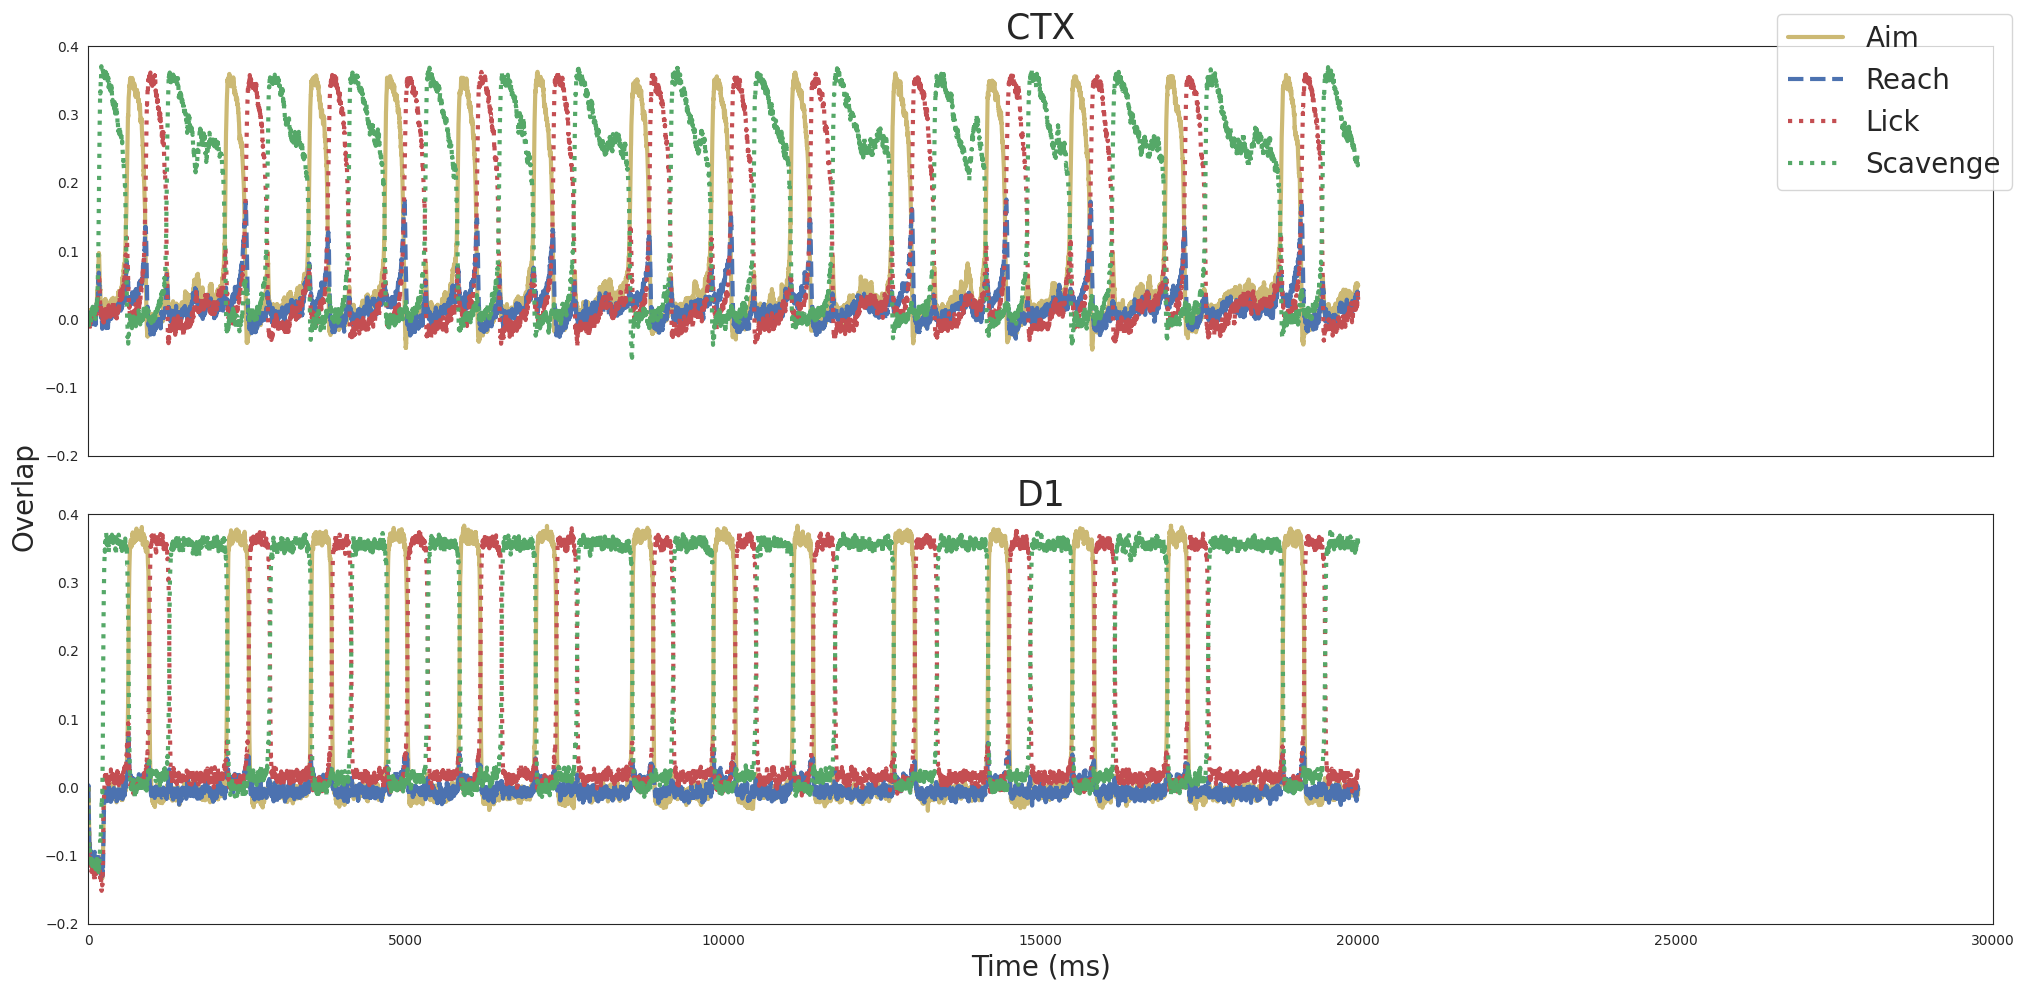

In [10]:
sns.set_style('white') 
colors = sns.color_palette('deep')

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, tight_layout=True, figsize=(20,10))
axes[0].plot(overlaps_ctx[0], linestyle='solid', linewidth=3, color=colors[8], label='Aim')
axes[0].plot(overlaps_ctx[1], linestyle='dashed', linewidth=3, color=colors[0], label='Reach')
axes[0].plot(overlaps_ctx[2], linestyle='dotted', linewidth=3, color=colors[3], label='Lick')
axes[0].plot(overlaps_ctx[3], linestyle='dotted', linewidth=3, color=colors[2], label='Scavenge')
# axes[0].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
axes[0].set_title("CTX", fontsize=25)
# axes.set_xlabel('Time (ms)', fontsize=20)
axes[1].plot(overlaps_d1[0], linestyle='solid', linewidth=3, color=colors[8])
axes[1].plot(overlaps_d1[1], linestyle='dashed', linewidth=3, color=colors[0])
axes[1].plot(overlaps_d1[2], linestyle='dotted', linewidth=3, color=colors[3])
axes[1].plot(overlaps_d1[3], linestyle='dotted', linewidth=3, color=colors[2])
# axes[1].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
axes[1].set_title("D1", fontsize=25)
axes[1].set_xlabel('Time (ms)', fontsize=20)
axes[1].set_xlabel('Time (ms)', fontsize=20)

fig.text(-0.01, 0.5, 'Overlap', va='center', rotation='vertical', fontsize=20)
plt.setp(axes, xlim=(0, 30000))
plt.setp(axes, ylim=(-.2, .4))
plt.figlegend(fontsize=20, loc='upper right')
# plt.figlegend(labels=['Aim', 'Reach', 'Lick'], fontsize=20)
plt.savefig('/work/jp464/striatum-sequence/output/simulation-heterogeneous-0.jpg', bbox_inches = "tight", format='jpg')

plt.show()


In [7]:
def temporal_diff(A, B, max_iter):
    sum = 0
    cnt = 0
    for i in range(len(A)):
        if i == 0: continue
        if B[i+1] == None:
            break
        diff = B[i+1][1] - A[i][1]
        sum += (diff)
        cnt += 1
    return sum / cnt

temporal_diff(mouse.behaviors[0], mouse.behaviors[1], 100)

498.0

In [8]:
print(mouse.behaviors[0][0:10])
print(mouse.behaviors[1][0:10])

[list([-1, 0]) list([3, 172]) list([0, 610]) list([2, 909])
 list([3, 1240]) list([0, 2164]) list([2, 2485]) list([3, 2824])
 list([0, 3482]) list([2, 3782])]
[list([-1, 1]) list([3, 238]) list([0, 636]) list([2, 962])
 list([3, 1278]) list([0, 2192]) list([2, 2531]) list([3, 2863])
 list([0, 3511]) list([2, 3838])]
